In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from adl import DataProcessor

# Descriptive Data Analysis

## Load Data

In [11]:
# Path to Wuerth Data
DATA_PATH = "../01_data/dataset_wuerth.csv"

In [12]:
processor = DataProcessor(DATA_PATH, remove_multicollinearity=False)
data_full = processor.process_data(mode=None, scale="None")
data_full = data_full.select_dtypes(exclude=["object"])

No scaling applied


## Data Overview

In [13]:
data_full.head()

,cust_id,district,emp_count,emp_count_lvl,potential,sales,rev_salesrep,rev_salesrep_neg,rev_branch_office,rev_branch_office_neg,...,market_seg_15,market_seg_17,market_seg_18,market_seg_21,market_seg_23,market_seg_26,ccp_most_used_2,ccp_most_used_3,ccp_most_used_4,ccp_most_used_5
0,40071,63128,1,0,2000.0,2445.11,647.36,0,0.00,0,...,False,False,False,False,False,False,False,False,True,False
1,66107,63502,10,2,34000.0,14070.62,12395.82,0,1219.93,0,...,False,False,False,False,False,False,False,False,False,False
2,33010,63122,8,1,47400.0,5893.92,0.00,0,1189.13,0,...,False,False,False,True,False,False,False,True,False,False
3,96845,63336,4,1,11500.0,1823.72,0.00,0,1823.72,0,...,False,False,False,False,False,False,True,False,False,False
4,64230,64028,8,1,27900.0,23654.08,10993.14,0,4550.01,0,...,False,False,False,False,False,True,False,True,False,False


In [14]:
data_full.describe()

,cust_id,district,emp_count,emp_count_lvl,potential,sales,rev_salesrep,rev_salesrep_neg,rev_branch_office,rev_branch_office_neg,...,flag_eshop,flag_red,flag_new_orsyshelf,flag_orsyonline,flag_orsyfleet,flag_clickandcollect,flag_sofortservice,flag_s24,share_buyweeks,share_buydays
count,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,...,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000
mean,55015.311709,63473.638357,4.410056,0.474480,18723.397192,4426.912582,1395.583496,0.004738,1829.637500,0.000484,...,0.234076,0.041739,0.094751,0.055640,0.015872,0.042811,0.010443,0.108410,0.035028,0.006794
std,26065.241593,1844.515481,7.358490,0.660273,24468.570154,12126.724184,5703.502516,0.068668,4887.973034,0.021998,...,0.423427,0.199995,0.292875,0.229229,0.124984,0.202434,0.101659,0.310903,0.066158,0.015389
min,10000.000000,60015.000000,1.000000,0.000000,0.000000,0.050000,-5810.120000,0.000000,-753.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000410,0.000059
25%,32363.000000,62211.000000,2.000000,0.000000,6000.000000,209.500000,0.000000,0.000000,32.107500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004586,0.000686
50%,54934.500000,63382.000000,3.000000,0.000000,12100.000000,964.540000,0.000000,0.000000,338.370000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013620,0.002177
75%,77671.750000,64092.000000,5.000000,1.000000,22200.000000,3826.775000,415.412500,0.000000,1607.490000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034653,0.006463
max,99998.000000,80016.000000,500.000000,2.000000,900000.000000,556059.980000,212765.780000,1.000000,159537.580000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.929379,0.519774


## Differences of different contact points with regard to the flag_new_orsyshelf Variable

In [15]:
data_full.groupby("flag_new_orsyshelf", as_index=False)[
    [
        "rev_salesrep",
        "rev_branch_office",
        "rev_internal_staff",
        "rev_ebusiness",
        "rev_others",
    ]
].describe().T

0              1
flag_new_orsyshelf             0.000000       1.000000
rev_salesrep       count   26178.000000    2740.000000
                   mean      653.094120    8489.337836
                   std      2765.270171   14654.197710
                   min     -5810.120000    -907.880000
                   25%         0.000000     451.112500
                   50%         0.000000    3655.050000
                   75%       197.015000   10783.325000
                   max    137493.360000  212765.780000
rev_branch_office  count   26178.000000    2740.000000
                   mean     1420.795969    5735.715460
                   std      3845.215647    9699.146305
                   min      -264.720000    -753.800000
                   25%        22.440000     520.820000
                   50%       280.465000    2624.405000
                   75%      1284.885000    6862.942500
                   max    159537.580000  143189.170000
rev_internal_staff count   26178.000000    2740.000000
                   mean      223.454732    1756.550682
                   std      2361.635385    6286.537328
                   min     -3960.120000   -1106.030000
                   25%         0.000000       0.000000
                   50%         0.000000     129.970000
                   75%         0.000000     824.760000
                   max    216934.190000  103670.220000
rev_ebusiness      count   26178.000000    2740.000000
                   mean      425.461965    4788.570047
                   std      2661.188592   11748.240990
                   min    -14524.760000   -1519.490000
                   25%         0.000000       0.000000
                   50%         0.000000     909.820000
                   75%         0.000000    5154.067500
                   max    251133.780000  325461.460000
rev_others         count   26178.000000    2740.000000
                   mean       -3.181894     -31.809927
                   std        41.207879     254.834976
                   min     -2322.600000   -8482.980000
                   25%         0.000000       0.000000
                   50%         0.000000       0.000000
                   75%         0.000000       0.000000
                   max      1032.520000    3747.050000

## Plots to Visualize Data

### Sales Histogram 

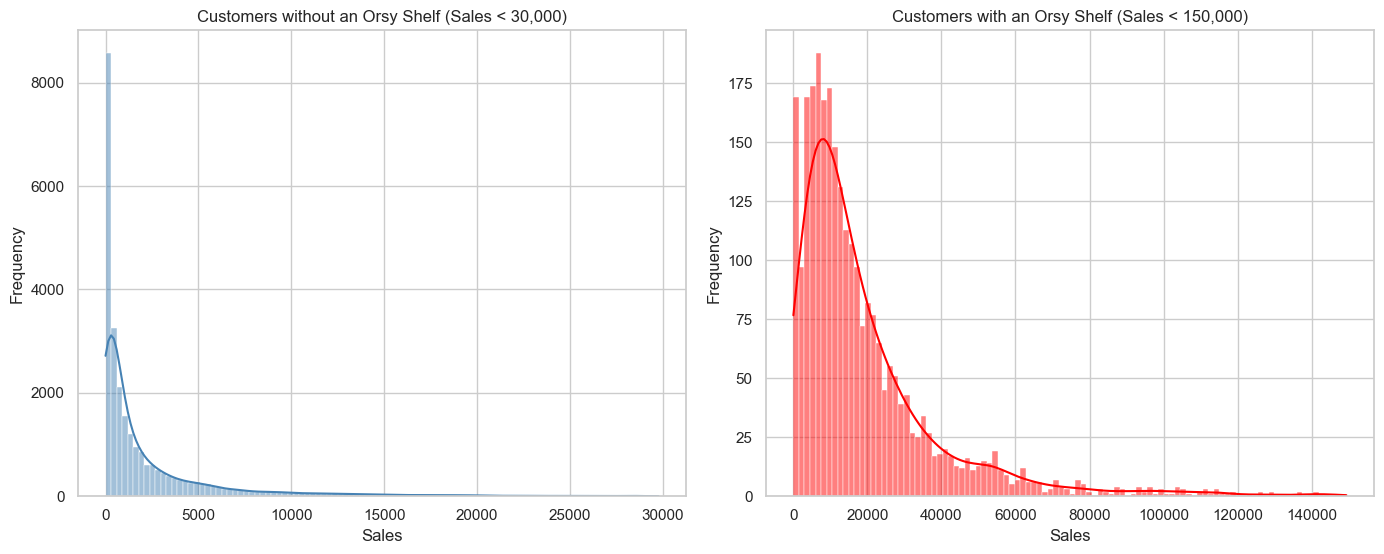

In [16]:
# Split data
df_new_orsy = data_full[data_full["flag_new_orsyshelf"] == 1]
df_non_orsy = data_full[data_full["flag_new_orsyshelf"] == 0]

# Cut sales at threshold for better visibility
threshold1 = 150000
threshold2 = 30000
df_new_orsy = df_new_orsy[df_new_orsy["sales"] < threshold1]
df_non_orsy = df_non_orsy[df_non_orsy["sales"] < threshold2]

# Set style
sns.set(style="whitegrid")

# Plot histograms with overlaid KDE plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non Orsy Shelf
sns.histplot(df_non_orsy["sales"], kde=True, bins=100, color="steelblue", ax=axes[0])
axes[0].set_title("Customers without an Orsy Shelf (Sales < 30,000)")
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Frequency")

# New Orsy Shelf
sns.histplot(df_new_orsy["sales"], kde=True, bins=100, color="red", ax=axes[1])
axes[1].set_title("Customers with an Orsy Shelf (Sales < 150,000)")
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency")

# plt.suptitle(
#     "Distribution of Sales for Orsy Shelf and Non Orsy Shelf Customers", fontsize=16
# )
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig(f"../03_report/graphs/sales_comparison_hist.png", dpi=1440)

plt.show()

### Scatterplot Sales and Orsy relevant sales

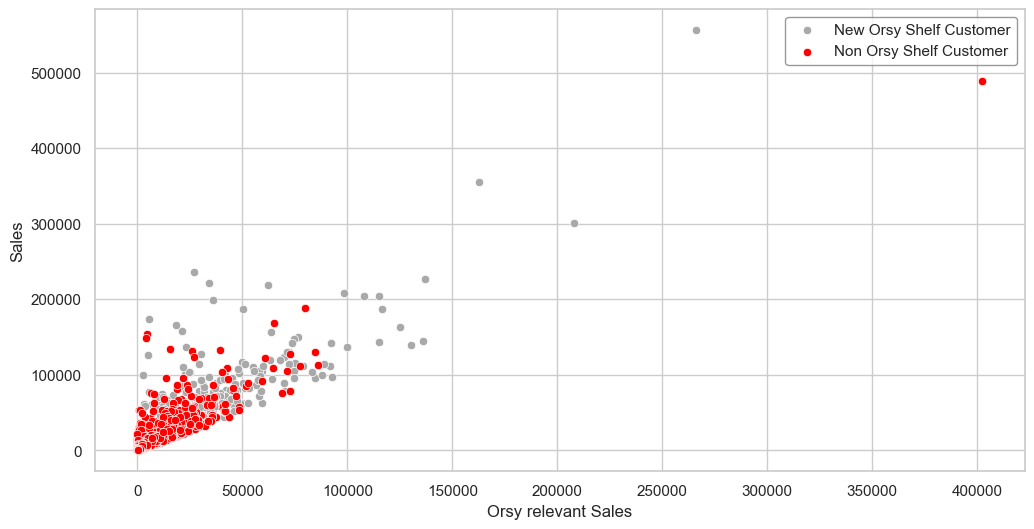

In [17]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Scatter plot for New Orsy Shelf
sns.scatterplot(
    x="sales_orsy_relevant",
    y="sales",
    data=data_full[data_full["flag_new_orsyshelf"] == 1],
    color="darkgrey",
    label="New Orsy Shelf Customer",
)

# Scatter plot for Non Orsy Shelf
sns.scatterplot(
    x="sales_orsy_relevant",
    y="sales",
    data=data_full[data_full["flag_new_orsyshelf"] == 0],
    color="red",
    label="Non Orsy Shelf Customer",
)

# Set x-axis label
plt.xlabel("Orsy relevant Sales")

# Set y-axis label
plt.ylabel("Sales")

# Set plot title
# plt.title(
#    "Scatterplot of Sales and Orsy relevant Sales for Orsy Shelf and Non Orsy Shelf Customers",
#    fontsize=16,
# )

# Show legend with a border
legend = plt.legend()
legend.get_frame().set_linewidth(1)
legend.get_frame().set_edgecolor("grey")

plt.savefig(f"../03_report/graphs/sales_scatter.png", dpi=1440)

# Show the plot
plt.show()

### Compute Ratio of Sales and Orsy relevant Sales for Orsy Customers and non Customers

In [18]:
# Filter data for New Orsy Shelf customers
new_orsy_data = data_full[data_full["flag_new_orsyshelf"] == 1]
non_orsy_data = data_full[data_full["flag_new_orsyshelf"] == 0]
# Calculate the sum of sales for Orsy relevant sales for New Orsy Shelf customers
orsy_relevant_sales_new_orsy = new_orsy_data["sales_orsy_relevant"].sum()
orsy_relevant_sales_non_orsy = non_orsy_data["sales_orsy_relevant"].sum()
# Calculate the total sales for New Orsy Shelf customers
total_sales_new_orsy = new_orsy_data["sales"].sum()
total_sales_non_orsy = non_orsy_data["sales"].sum()
# Calculate the ratio of Orsy relevant sales to total sales for New Orsy Shelf customers
ratio_new = orsy_relevant_sales_new_orsy / total_sales_new_orsy
ratio_non = orsy_relevant_sales_non_orsy / total_sales_non_orsy
# Print the result
print("Ratio of Orsy relevant sales for New Orsy Shelf customers:", ratio_new)
print("Ratio of Orsy relevant sales for Non Orsy Shelf customers:", ratio_non)

Ratio of Orsy relevant sales for New Orsy Shelf customers: 0.45817571572762017
Ratio of Orsy relevant sales for Non Orsy Shelf customers: 0.44499700829519917


# Variable Selection

## Correlation

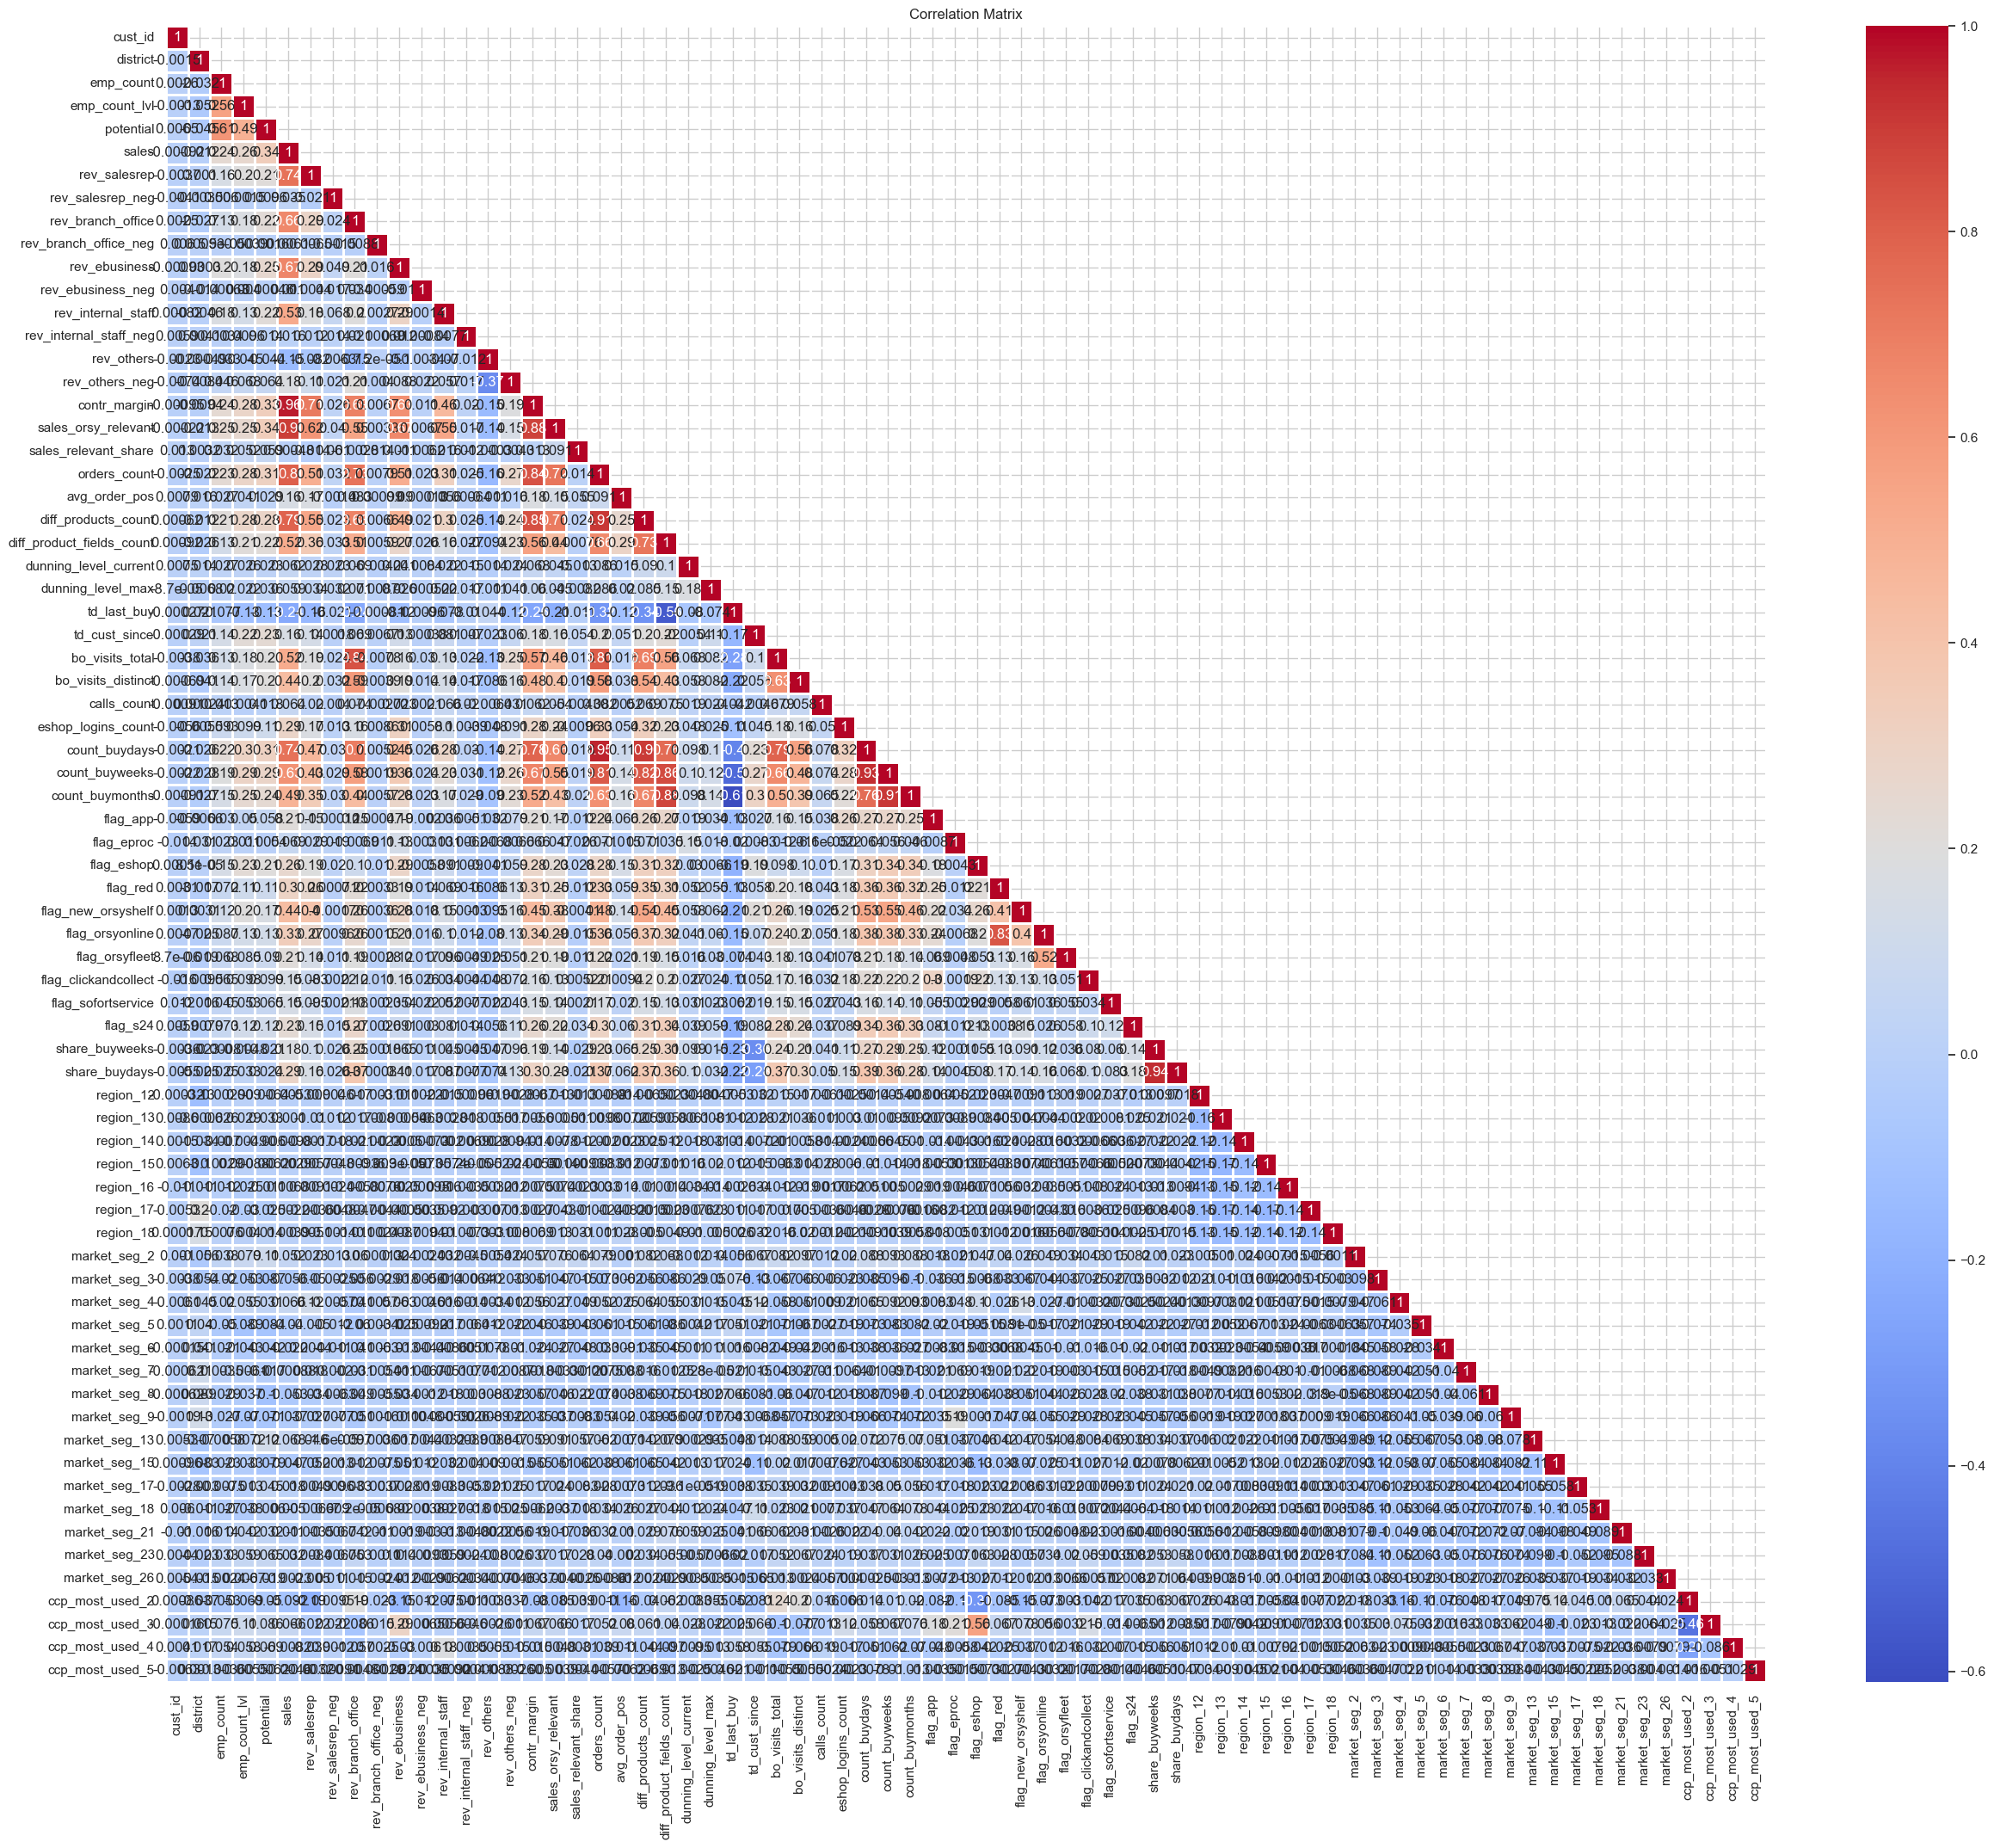

In [19]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(30, 25))
mask = np.triu(data_full.corr(), k=1)
sns.heatmap(data_full.corr(), annot=True, linewidths=1, mask=mask, cmap="coolwarm")

plt.title("Correlation Matrix")
# plt.savefig('corr_matrix.png')
plt.show()

### Correlation heat map of new orsy shelf to its most correlated features

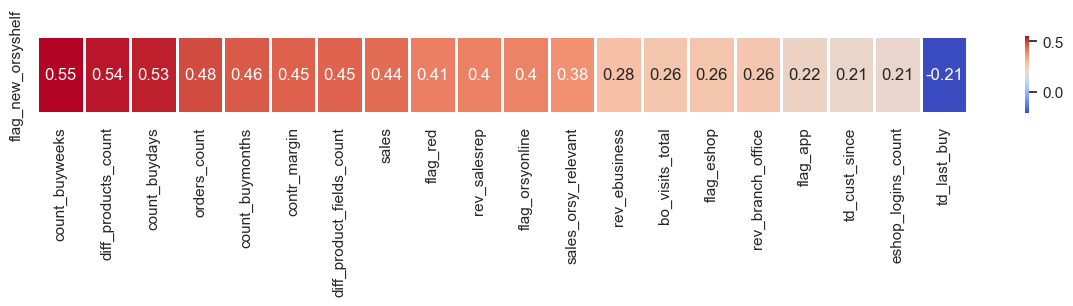

In [20]:
# Plot the correlation matrix heatmap for its most correlated features
plt.figure(figsize=(15, 1))
correlations = (
    data_full.corr()[["flag_new_orsyshelf"]]
    .sort_values("flag_new_orsyshelf", ascending=False)
    .T
)
highest_corr = (
    correlations[abs(correlations) > 0.2]
    .dropna(axis=1)
    .drop(["flag_new_orsyshelf"], axis=1)
)
sns.heatmap(highest_corr, annot=True, linewidths=1, cmap="coolwarm")


# plt.title("Correlations of flag_new_orsyshelf")

plt.savefig(f"../03_report/graphs/new_orsy_corrs.png", bbox_inches='tight', dpi=1440)

plt.show()

In [21]:
highest_corr.dropna(axis=1)

,count_buyweeks,diff_products_count,count_buydays,orders_count,count_buymonths,contr_margin,diff_product_fields_count,sales,flag_red,rev_salesrep,flag_orsyonline,sales_orsy_relevant,rev_ebusiness,bo_visits_total,flag_eshop,rev_branch_office,flag_app,td_cust_since,eshop_logins_count,td_last_buy
flag_new_orsyshelf,0.550915,0.536824,0.532806,0.483955,0.462725,0.45372,0.449746,0.435175,0.405389,0.402392,0.401546,0.377152,0.278075,0.26413,0.262583,0.258539,0.224679,0.209874,0.206701,-0.213055


## Lasso

### Use standardized Data

In [22]:
# Standardize Data
data_stand = processor.process_data(mode=None, scale="standardize")
exclude_variables = ["cust_id", "district", "branch_office", "bo_highest_sales"]
data_stand = data_stand.drop(columns=exclude_variables, axis=1)
# Define features and the target variable
df_features = data_stand.drop(["flag_new_orsyshelf"], axis=1)
df_target = data_stand["flag_new_orsyshelf"]

Unbiased standardizing applied


### K-Fold CV to get optimal penalization term

In [23]:
# Split Data in Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.3, random_state=42
)

# Define the parameter grid
param_grid = {"alpha": np.linspace(0.0001, 0.001, 10)}

# Initialize the Lasso model
lasso = Lasso(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(
    lasso, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-2
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Optimal Alpha: {grid_search.best_params_['alpha']}")
print(f"Best Score: {grid_search.best_score_}")

Optimal Alpha: 0.0005
Best Score: -0.04913266509744172


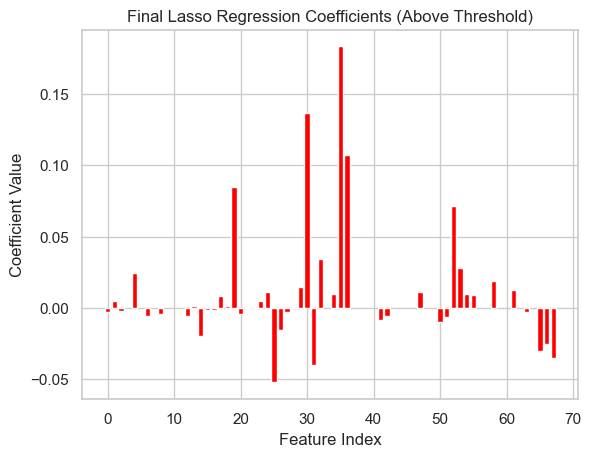

In [24]:
# Fit Lasso with optiaml alpha to the data
optimal_alpha = grid_search.best_params_["alpha"]

final_lasso_model = Lasso(alpha=optimal_alpha)
final_lasso_model.fit(df_features, df_target)

# Get coefficients of the final model
final_coefficients = final_lasso_model.coef_

# Threshold for choosing coefficients
threshold = 0

# Get the feature names
feature_names = data_stand.columns

# Print the coefficients for each feature above the threshold
selected_features = [
    (feature, coef)
    for feature, coef in zip(feature_names, final_coefficients)
    if abs(coef) > threshold
]

# Plot coefficients for selected features
selected_indices = [
    i for i, coef in enumerate(final_coefficients) if abs(coef) > threshold
]
plt.bar(
    selected_indices, [final_coefficients[i] for i in selected_indices], color="red"
)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Final Lasso Regression Coefficients (Above Threshold)")

plt.savefig(f"../03_report/graphs/lasso.png", dpi=1440)

plt.show()

### Comparison Lasso and Correlation
We want to see whether both methods choose the same features.

In [25]:
# Compare 0.2 threshold corr and features lasso
correlation_matrix = data_full.corr()
correlations = correlation_matrix["flag_new_orsyshelf"]
corr_features = correlations[np.abs(correlations) >= 0.2].index.tolist()

matched_indexes = []

for l in corr_features:
    for i in range(len(selected_features)):
        if l == selected_features[i][0]:
            matched_indexes.append(selected_features[i][0])

print(matched_indexes)

len(matched_indexes)

['rev_salesrep', 'rev_branch_office', 'rev_ebusiness', 'contr_margin', 'sales_orsy_relevant', 'orders_count', 'diff_products_count', 'diff_product_fields_count', 'td_last_buy', 'td_cust_since', 'bo_visits_total', 'eshop_logins_count', 'count_buydays', 'count_buyweeks', 'count_buymonths', 'flag_app', 'flag_eshop', 'flag_red', 'flag_new_orsyshelf']


19

In [26]:
# Differences of the features
difference = [item for item in corr_features if item not in matched_indexes]
difference

['sales', 'flag_orsyonline']